In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import sys
sys.path.append('../helper_classes')
from limit_utils import get_median_sensitivity

# Define the likelihoods and output directories for the configurations
configs = [
    {
        "likelihood": "likelihoods/SI_60t_140ty_mig_0.2-2.0Gev_500toys_40_mu_AC_test.pkl",
        "directory": "outputs/SI_60t_140ty_mig_0.2-2.0Gev_500toys_40_mu_AC_test",
        "label": "XLZD_60t_140ty (Testing AC 8 events/ty)",
        "color": "blue"
    },
     {
        "likelihood": "likelihoods/SI_60t_140ty_mig_0.4-2.0Gev_50toys_20_mu_AC_test_scalingD1k.pkl",
        "directory": "outputs/SI_60t_140ty_mig_0.4-2.0Gev_50toys_20_mu_AC_test_scalingD1k",
        "label": "XLZD_60t_140ty (AC_rate : 1e3 events/ty [Pre-Pessimistic])",
        "color": "black"
    },
       {
        "likelihood": "likelihoods/SI_80t_140ty_mig_0.2-2.0Gev_200toys_25_mu_AC_test_scaling350.pkl",
        "directory": "outputs/SI_80t_140ty_mig_0.2-2.0Gev_200toys_25_mu_AC_test_scaling350",
        "label": "XLZD_80t_140ty (AC_rate : 350 events/ty [DARWIN BG goal])",
        "color": "red"
    },

     {
        "likelihood": "likelihoods/SI_80t_750ty_mig_0.2-2.0Gev_100toys_25_mu_AC_test_scaling350.pkl",
        "directory": "outputs/SI_80t_750ty_mig_0.2-2.0Gev_100toys_25_mu_AC_test_scaling350",
        "label": "XLZD_80t_750ty (AC_rate : 350 events/ty [DARWIN BG goal])",
        "color": "purple"
    },
     {
        "likelihood": "likelihoods/SI_60t_140ty_mig_0.3-2.0Gev_500toys_25_mu_AC_4fold_parallelising_testing.pkl",
        "directory": "outputs/SI_60t_140ty_mig_0.3-2.0Gev_500toys_25_mu_AC_4fold_parallelising_testing",
        "label": "XLZD_60t_140ty (Testing AC-4fold parallel 226 events/ty)",
        "color": "pink"
    },
     
      {
        "likelihood": "likelihoods/SI_40t_140ty_mig_0.3-2.0Gev_1000toys_25_new_mu_4fold.pkl",
        "directory": "outputs/SI_40t_140ty_mig_0.3-2.0Gev_1000toys_25_new_mu_4fold",
        "label": "XLZD_40t_140ty (4-fold-52 AC events/ty @ 240V/cm and 1k toys)",
        "color": "magenta"
    },
    
]

------------------------------------------
Migdal ionisation probabilities
P. Cox, M. Dolan, C. McCabe, H. Quiney (2022)
arXiv:2208.12222
------------------------------------------


/Users/amirr/Desktop/Flame/wimprates/wimprates/__init__.py:6: UserWarning: Default WIMP parameters are changed in accordance with https://arxiv.org/abs/2105.00599 (github.com/JelleAalbers/wimprates/pull/14)
  warnings.warn(


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import sys
sys.path.append('../helper_classes')
from limit_utils import get_median_sensitivity

# Define the likelihoods and output directories for the configurations
configs = [
     {
        "likelihood": "likelihoods/SI_40t_140ty_mig_0.3-2.0Gev_1000toys_25_new_mu_4fold.pkl",
        "directory": "outputs/SI_40t_140ty_mig_0.3-2.0Gev_1000toys_25_new_mu_4fold",
        "label": "XLZD_40t_140ty (4-fold-52 AC events/ty @ 240V/cm and 1k toys)",
        "color": "black"
    },
    {
        "likelihood": "likelihoods/SI_60t_140ty_mig_0.3-2.0Gev_250toys_25_new_mu_3fold.pkl",
        "directory": "outputs/SI_40t_140ty_mig_0.3-2.0Gev_250toys_25_new_mu_3fold",
        "label": "XLZD_40t_140ty (3-fold-1356 AC events/ty @ 240V/cm and 250 toys)",
        "color": "cyan"
    },
     {
        "likelihood": "likelihoods/SI_80t_950ty_mig_0.3-2.0Gev_250toys_25_new_mu_4fold",
        "directory": "outputs/SI_40t_140ty_mig_0.3-2.0Gev_250toys_25_new_mu_3fold",
        "label": "XLZD_40t_140ty (3-fold-1356 AC events/ty @ 240V/cm and 250 toys)",
        "color": "cyan"
    },
    
    


]

------------------------------------------
Migdal ionisation probabilities
P. Cox, M. Dolan, C. McCabe, H. Quiney (2022)
arXiv:2208.12222
------------------------------------------


/Users/amirr/Desktop/Flame/wimprates/wimprates/__init__.py:6: UserWarning: Default WIMP parameters are changed in accordance with https://arxiv.org/abs/2105.00599 (github.com/JelleAalbers/wimprates/pull/14)
  warnings.warn(


In [2]:
def get_signal_rates_from_likelihood(likelihood_file, likelihood_module):
    likelihood_class = __import__(likelihood_module, globals(), locals(), [])
    class_names = [name for name in dir(likelihood_class) if isinstance(getattr(likelihood_class, name), type)]
    globals().update({name: getattr(likelihood_class, name) for name in class_names})
    
    likelihood_container = pkl.load(open(likelihood_file, 'rb'))
    signal_expected_mean = likelihood_container.expected_signal_counts
    
    return signal_expected_mean

In [3]:
def scaling_fn(mu, mu_ref):
    return mu / mu_ref * 1e-45

In [4]:
results = []  # List to store data for all configurations

for config in configs:
    # Load the signal expected mean
    signal_expected_mean = get_signal_rates_from_likelihood(config["likelihood"], 'create_simple_template_likelihood')
    
    # Get sensitivity data
    masses, all_bands, mus, pval_curves = get_median_sensitivity(
        directory=config["directory"],
        scaling_fn=scaling_fn,
        signal_name='WIMP0',
        signal_expected_mean=signal_expected_mean,
        return_pval_curves=True
    )
    
    # Convert masses for plotting
    masses_int = np.array([int(float(mass)) for mass in masses]) 
    masses_plot = masses_int * 1e-1  # Scale masses

    # Store the results for this configuration
    results.append({
        "config": config["label"],
        "masses_plot": masses_plot,
        "all_bands": all_bands,
        "mus": mus,
        "color": config["color"]
    })



masses from get sensitivity fn ['03', '04', '06', '08', '10', '12', '14', '16', '18', '20']
Found 1 failed toy for WIMP006; removing...
Found 4 failed toy for WIMP008; removing...
Found 1 failed toy for WIMP012; removing...
Found 2 failed toy for WIMP014; removing...
Found 2 failed toy for WIMP016; removing...
Found 4 failed toy for WIMP018; removing...
Found 3 failed toy for WIMP020; removing...
masses from get sensitivity fn ['03', '04', '06', '08', '10', '12', '14', '16', '18', '20']
Found 107 failed toy for WIMP003; removing...
Found 80 failed toy for WIMP004; removing...
Found 109 failed toy for WIMP006; removing...
Found 119 failed toy for WIMP008; removing...
Found 68 failed toy for WIMP010; removing...
Found 72 failed toy for WIMP012; removing...
Found 78 failed toy for WIMP014; removing...
Found 80 failed toy for WIMP016; removing...
Found 84 failed toy for WIMP018; removing...
Found 87 failed toy for WIMP020; removing...
masses from get sensitivity fn ['03', '04', '06', '08',

In [5]:
# Results stores all the relevant data for plotting, can access it's attributes here for different configs:
print(len(results))
print(results[0].keys())

print(results[0]["masses_plot"])
print((results[0]["all_bands"][0][4]))

print(results[1].keys())

print(results[1]["masses_plot"])
print((results[1]["all_bands"][0][4]))

3
dict_keys(['config', 'masses_plot', 'all_bands', 'mus', 'color'])
[0.3 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
8.555541690573116e-41
dict_keys(['config', 'masses_plot', 'all_bands', 'mus', 'color'])
[0.3 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
1.467543378719345e-40


In [ ]:
from tabulate import tabulate
import re

# Iterate over all configurations in results
for result in results:
    detector_label = result["config"]
    masses = result["masses_plot"]
    all_bands = result["all_bands"]

    sanitized_label = re.sub(r"[^\w\-_]", "_", detector_label)
    filename = f"Migdal_S1_S2_{sanitized_label}_all_bands.txt"

    # Data for the table
    table_data = []
    for i in range(len(masses)):
        table_data.append([
            f"{masses[i]:.2f}",
            f"{all_bands[0][i]:.6e}",
            f"{all_bands[-1][i]:.6e}",
            f"{all_bands[1][i]:.6e}",
            f"{all_bands[-2][i]:.6e}",
            f"{all_bands[2][i]:.6e}"
        ])

    # Table header
    headers = ["Mass (GeV)", "Median", "-1σ", "+1σ", "-2σ", "+2σ"]

    # Create formatted table
    table_output = tabulate(table_data, headers=headers, tablefmt="grid")

    # Write to file
    with open(filename, "w") as f:
        f.write(table_output)

    print(f"Saved: {filename}")


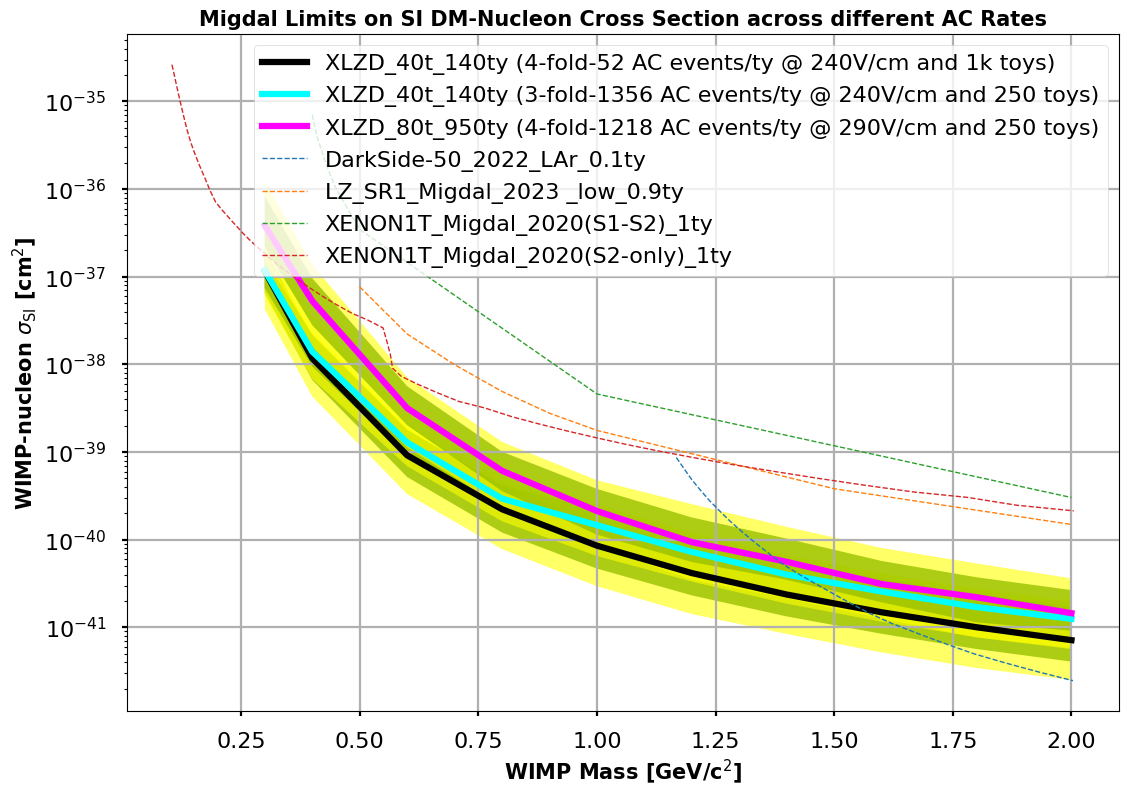

In [6]:
# Plot all configurations
plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots()
for result in results:
    ax.plot(result["masses_plot"], result["all_bands"][0], color=result["color"], lw=4.5, label=result["config"])
    ax.fill_between(result["masses_plot"], result["all_bands"][-1], result["all_bands"][1], 
                    facecolor="darkgreen", lw=0, alpha=0.8)
    ax.fill_between(result["masses_plot"], result["all_bands"][-2], result["all_bands"][2], 
                   facecolor="yellow", lw=0, alpha=0.6)


def plot_data_from_files(master_path, filenames):
    for filename in filenames:
        file_path = os.path.join(master_path, filename)
        
        # Check if file exists
        if os.path.exists(file_path):
            
            data = np.loadtxt(file_path)
            x = data[:, 0]
            y = data[:, 1]
            if filename != 'neutrino_fog_low.txt' : 
                line, = ax.plot(x, y, label=filename.replace('.txt', ''), lw=1,linestyle="--")
            
            elif filename == 'neutrino_fog_low.txt':  
                ax.plot(x, y, color='black', lw=1,linestyle="-.")  
                ax.fill_between(x, y, color='lightblue', alpha=0.5)  # Fill area under curve with light blue
                ax.text(0.2, 5e-45,  
            "Neutrino Floor For Xe", color='black', fontsize=12, ha='left', va='bottom', fontweight='bold')
                
        else:
            print(f"File {filename} not found in the directory.")
            
    ax.legend(loc='upper right')
    #plt.show()
master_path = '/Users/amirr/Desktop/Flame/FlameFitSimple/analyses/Plotting'  # Path to your directory , this data needs to be downloaded from Cirian's GitHub page : https://github.com/cajohare/DirectDetectionPlots/tree/main/data/limits/Nucleon/SI
filenames = ["DarkSide-50_2022_LAr_0.1ty.txt","LZ_SR1_Migdal_2023 _low_0.9ty.txt","XENON1T_Migdal_2020(S1-S2)_1ty.txt","XENON1T_Migdal_2020(S2-only)_1ty.txt"] # List of your filename
#filenames = ['neutrino_fog_low.txt']
plot_data_from_files(master_path, filenames)
# Customize plot
xlab = r'WIMP Mass [GeV/c$^2$]'
ylab = r'WIMP-nucleon $\sigma_{\rm SI}$ [cm$^2$]'
ax.set_xlabel(xlab, fontsize=15,fontweight='bold')
ax.set_ylabel(ylab, fontsize=15,fontweight='bold')
#ax.set_ylim(4e-43,2e-42)
ax.set_yscale('log')
ax.set_xscale('linear')
plt.title("Migdal Limits on SI DM-Nucleon Cross Section across different AC Rates",fontweight='bold',fontsize=15)
plt.grid()
plt.legend()
plt.show()


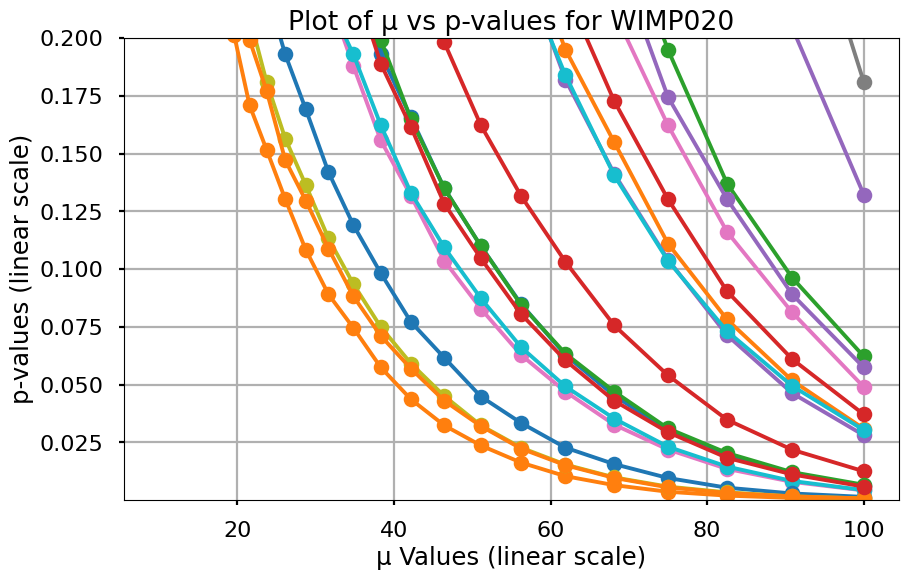

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot multiple rows (toys) for a single WIMP mass
def plot_rows_for_mass(wimp_mass, row_indices):
    plt.figure(figsize=(10, 6))
    for row_index in row_indices:
        mu_values = mus[wimp_mass]
        p_values = pval_curves[wimp_mass][row_index]
        
        # Mask out any NaN values
        valid_indices = ~np.isnan(p_values)
        
        plt.plot(np.array(mu_values)[valid_indices], p_values[valid_indices], 
                 marker='o', label=f'Toy {row_index+1}')
    
    plt.xscale('linear')
    plt.ylim(0.00009,0.20)
    plt.yscale('linear')
    plt.xlabel('μ Values (linear scale)')
    plt.ylabel('p-values (linear scale)')
    plt.title(f'Plot of μ vs p-values for {wimp_mass}')
    #plt.legend()
    plt.grid()
    plt.show()
    
wimp_masses = ['WIMP020']  # WIMP masses to include in the plots
row_indices_to_plot = np.arange(0,25,1)
# Plot multiple rows for each mass
for wimp_mass in wimp_masses:
    plot_rows_for_mass(wimp_mass, row_indices_to_plot)